Data preparation


In [145]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
# Load the dataset
df = pd.read_csv("/Shipping_data.csv")

In [147]:
print(df.head())

  Shipment ID     Origin Destination Shipment Date Planned Delivery Date  \
0  SHIP000000     Jaipur      Mumbai    2023-04-26            2023-05-01   
1  SHIP000001  Bangalore       Delhi    2023-02-09            2023-02-13   
2  SHIP000002     Mumbai     Chennai    2023-09-19            2023-09-25   
3  SHIP000003  Hyderabad   Ahmedabad    2023-04-01            2023-04-05   
4  SHIP000004    Chennai     Kolkata    2023-11-24            2023-11-26   

  Actual Delivery Date Vehicle Type  Distance (km) Weather Conditions  \
0           2023-05-02      Trailer           1603               Rain   
1           2023-02-17      Trailer           1237              Storm   
2           2023-09-25        Truck           1863              Clear   
3           2023-04-05    Container           1374              Clear   
4           2023-11-28    Container            676              Clear   

  Traffic Conditions Delayed  
0              Light     Yes  
1           Moderate     Yes  
2          

In [148]:
df.shape

(20000, 11)

In [149]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Shipment ID            20000 non-null  object
 1   Origin                 20000 non-null  object
 2   Destination            20000 non-null  object
 3   Shipment Date          20000 non-null  object
 4   Planned Delivery Date  20000 non-null  object
 5   Actual Delivery Date   20000 non-null  object
 6   Vehicle Type           19403 non-null  object
 7   Distance (km)          20000 non-null  int64 
 8   Weather Conditions     20000 non-null  object
 9   Traffic Conditions     20000 non-null  object
 10  Delayed                20000 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.7+ MB
None


In [150]:
# Check for missing values
print(df.isnull().sum())

Shipment ID                0
Origin                     0
Destination                0
Shipment Date              0
Planned Delivery Date      0
Actual Delivery Date       0
Vehicle Type             597
Distance (km)              0
Weather Conditions         0
Traffic Conditions         0
Delayed                    0
dtype: int64


There are 597 missing values in Vehicle Type (object)

In [151]:
# Fill missing values based on column type
df['Vehicle Type'] = df['Vehicle Type'].fillna('Unknown')

In [152]:
print(df.isnull().sum())

Shipment ID              0
Origin                   0
Destination              0
Shipment Date            0
Planned Delivery Date    0
Actual Delivery Date     0
Vehicle Type             0
Distance (km)            0
Weather Conditions       0
Traffic Conditions       0
Delayed                  0
dtype: int64


Exploratory Data Analysis

In [153]:
# Summary statistics for numerical columns
print(df.describe())

       Distance (km)
count   20000.000000
mean     1101.663750
std       520.717873
min       200.000000
25%       649.750000
50%      1102.000000
75%      1551.000000
max      2000.000000


In [154]:
# Value counts for categorical columns
print(df['Vehicle Type'].value_counts())
print(df['Weather Conditions'].value_counts())

Vehicle Type
Lorry        4878
Truck        4860
Trailer      4838
Container    4827
Unknown       597
Name: count, dtype: int64
Weather Conditions
Clear    13952
Rain      3067
Fog       2014
Storm      967
Name: count, dtype: int64


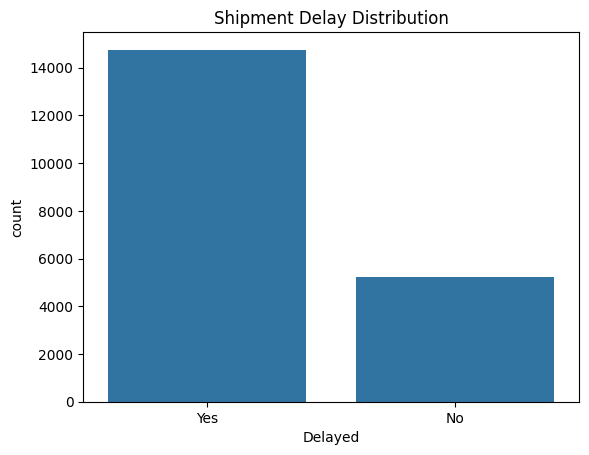

In [155]:
# Visualizing Target Variable (Delay)
# Plot distribution of the target variable
sns.countplot(x='Delayed', data=df)
plt.title('Shipment Delay Distribution')
plt.show()

In [156]:
# Percentage breakdown
delay_counts = df['Delayed'].value_counts(normalize=True) * 100
print("Delay distribution (%):")
print(delay_counts)

Delay distribution (%):
Delayed
Yes    73.785
No     26.215
Name: proportion, dtype: float64


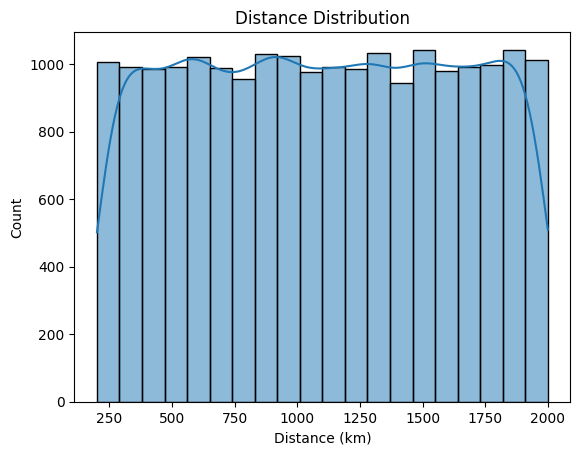

In [157]:
# Histogram for Distance
sns.histplot(df['Distance (km)'], kde=True, bins=20)
plt.title('Distance Distribution')
plt.xlabel('Distance (km)')
plt.show()

Vehicle Type

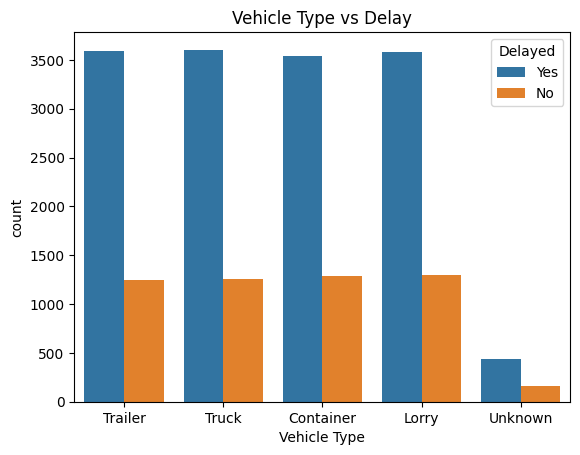

In [158]:
# Countplot for Vehicle Type vs Delay
sns.countplot(x='Vehicle Type', hue='Delayed', data=df)
plt.title('Vehicle Type vs Delay')
plt.show()


Weather Conditions

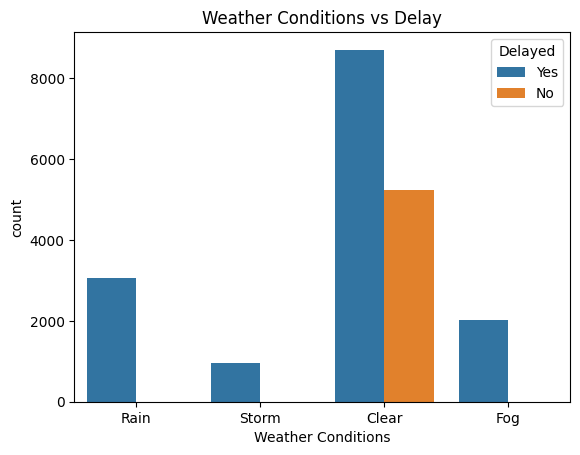

In [159]:
# Countplot for Weather Conditions vs Delay
sns.countplot(x='Weather Conditions', hue='Delayed', data=df)
plt.title('Weather Conditions vs Delay')
plt.show()

Analyze Traffic Conditions

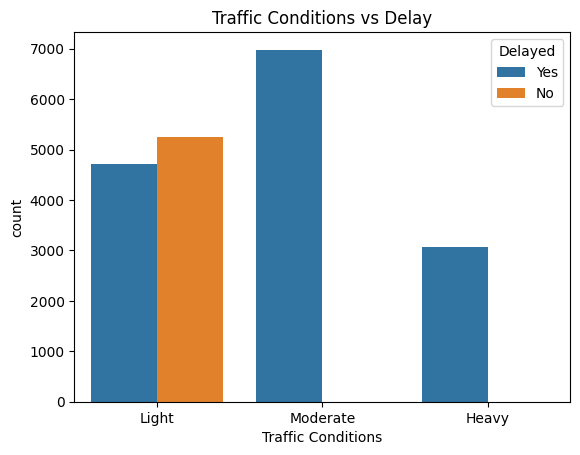

In [160]:
# Countplot for Traffic Conditions vs Delay
sns.countplot(x='Traffic Conditions', hue='Delayed', data=df)
plt.title('Traffic Conditions vs Delay')
plt.show()


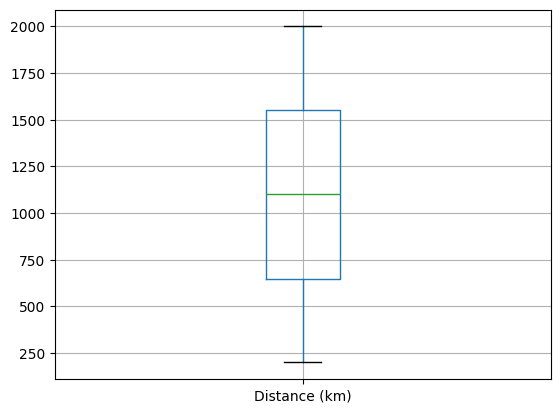

In [161]:
### outliers
df.boxplot(column=["Distance (km)"])
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-1.5*IQR
    upper_range=Q3+1.5*IQR
    return lower_range,upper_range

In [162]:
# Save to a new CSV file
df.to_csv('cleaned_dataset.csv', index=False)


Model Development

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [164]:
## load the data set
ship_df=pd.read_csv("/Shipping_data.csv")

In [165]:
ship_df.head()

,Shipment ID,Origin,Destination,Shipment Date,Planned Delivery Date,Actual Delivery Date,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed
0,SHIP000000,Jaipur,Mumbai,2023-04-26,2023-05-01,2023-05-02,Trailer,1603,Rain,Light,Yes
1,SHIP000001,Bangalore,Delhi,2023-02-09,2023-02-13,2023-02-17,Trailer,1237,Storm,Moderate,Yes
2,SHIP000002,Mumbai,Chennai,2023-09-19,2023-09-25,2023-09-25,Truck,1863,Clear,Light,No
3,SHIP000003,Hyderabad,Ahmedabad,2023-04-01,2023-04-05,2023-04-05,Container,1374,Clear,Light,No
4,SHIP000004,Chennai,Kolkata,2023-11-24,2023-11-26,2023-11-28,Container,676,Clear,Heavy,Yes


In [166]:
ship_df.shape

(20000, 11)

In [167]:
ship_df.sample(10)

,Shipment ID,Origin,Destination,Shipment Date,Planned Delivery Date,Actual Delivery Date,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed
10667,SHIP010667,Delhi,Chennai,2023-09-16,2023-09-21,2023-09-21,Container,1597,Clear,Light,No
3909,SHIP003909,Chennai,Delhi,2023-03-21,2023-03-23,2023-03-25,Lorry,774,Clear,Heavy,Yes
12533,SHIP012533,Delhi,Kolkata,2023-08-06,2023-08-12,2023-08-13,Lorry,1941,Clear,Moderate,Yes
15015,SHIP015015,Bangalore,Jaipur,2023-08-14,2023-08-15,2023-08-15,NaN,597,Clear,Light,No
2114,SHIP002114,Chennai,Pune,2024-03-17,2024-03-18,2024-03-22,Lorry,432,Fog,Heavy,Yes
3737,SHIP003737,Jaipur,Pune,2024-02-02,2024-02-05,2024-02-07,Truck,925,Rain,Moderate,Yes
4984,SHIP004984,Hyderabad,Ahmedabad,2024-04-09,2024-04-13,2024-04-13,Trailer,1497,Clear,Light,No
7814,SHIP007814,Ahmedabad,Lucknow,2023-01-12,2023-01-13,2023-01-19,Trailer,436,Clear,Heavy,Yes
18486,SHIP018486,Pune,Kolkata,2023-10-07,2023-10-13,2023-10-16,Lorry,1877,Rain,Heavy,Yes
11587,SHIP011587,Chennai,Jaipur,2023-09-24,2023-09-25,2023-09-29,Lorry,448,Storm,Moderate,Yes


In [168]:
ship_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Shipment ID            20000 non-null  object
 1   Origin                 20000 non-null  object
 2   Destination            20000 non-null  object
 3   Shipment Date          20000 non-null  object
 4   Planned Delivery Date  20000 non-null  object
 5   Actual Delivery Date   20000 non-null  object
 6   Vehicle Type           19403 non-null  object
 7   Distance (km)          20000 non-null  int64 
 8   Weather Conditions     20000 non-null  object
 9   Traffic Conditions     20000 non-null  object
 10  Delayed                20000 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.7+ MB


In [169]:
ship_df.isnull().sum()

,0
Shipment ID,0
Origin,0
Destination,0
Shipment Date,0
Planned Delivery Date,0
Actual Delivery Date,0
Vehicle Type,597
Distance (km),0
Weather Conditions,0
Traffic Conditions,0


In [170]:
ship_df.dtypes

,0
Shipment ID,object
Origin,object
Destination,object
Shipment Date,object
Planned Delivery Date,object
Actual Delivery Date,object
Vehicle Type,object
Distance (km),int64
Weather Conditions,object
Traffic Conditions,object


In [171]:
ship_df.drop("Shipment ID",axis=1,inplace=True)

In [172]:
ship_df.drop("Shipment Date",axis=1,inplace=True)

In [173]:
ship_df.drop("Planned Delivery Date",axis=1,inplace=True)

In [174]:
ship_df.drop("Actual Delivery Date",axis=1,inplace=True)

In [175]:
ship_df.shape

(20000, 7)

In [176]:
ship_df.sample(10)

,Origin,Destination,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed
12690,Mumbai,Delhi,Truck,1668,Clear,Light,No
1552,Hyderabad,Ahmedabad,Container,436,Clear,Moderate,Yes
5873,Pune,Jaipur,Container,1535,Clear,Light,No
18670,Lucknow,Delhi,Lorry,937,Clear,Light,Yes
8529,Kolkata,Mumbai,Container,1203,Clear,Moderate,Yes
18572,Delhi,Bangalore,Trailer,1450,Clear,Light,No
19100,Delhi,Kolkata,Lorry,1657,Clear,Light,Yes
4209,Delhi,Pune,Lorry,1959,Rain,Light,Yes
5142,Hyderabad,Ahmedabad,Trailer,691,Clear,Light,No
8010,Chennai,Mumbai,NaN,1332,Rain,Light,Yes


In [177]:
ship_df.isnull().sum()

,0
Origin,0
Destination,0
Vehicle Type,597
Distance (km),0
Weather Conditions,0
Traffic Conditions,0
Delayed,0


In [178]:
from sklearn.preprocessing import LabelEncoder

# Convert Vehicle Type to numeric using Label Encoding
le = LabelEncoder()
ship_df["Vehicle Type"] = le.fit_transform(ship_df["Vehicle Type"])

# Calculate the median now
median_vehicle_type = ship_df["Vehicle Type"].median()
print(f"The median Vehicle Type (encoded) is: {median_vehicle_type}")


The median Vehicle Type (encoded) is: 2.0


In [179]:
# Convert Vehicle Type to numeric using One-Hot Encoding
ship_df_encoded = pd.get_dummies(ship_df, columns=["Vehicle Type"], drop_first=True)


In [180]:
# Fill missing values with the mode
ship_df["Vehicle Type"].fillna(median_vehicle_type, inplace=True)


<ipython-input-180-0af392ba8247>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ship_df["Vehicle Type"].fillna(median_vehicle_type, inplace=True)


In [181]:
ship_df.dtypes

,0
Origin,object
Destination,object
Vehicle Type,int64
Distance (km),int64
Weather Conditions,object
Traffic Conditions,object
Delayed,object


In [182]:
ship_df.isnull().sum()

,0
Origin,0
Destination,0
Vehicle Type,0
Distance (km),0
Weather Conditions,0
Traffic Conditions,0
Delayed,0


In [183]:
# Define the target variable and features
X = df.drop('Delayed', axis=1)  # Features
y = df['Delayed'] # Target variable

In [184]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [185]:
# Verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (16000, 10)
Shape of X_test: (4000, 10)
Shape of y_train: (16000,)
Shape of y_test: (4000,)


Train Logistic Regression

In [186]:
# Step 1: Drop irrelevant columns like 'Shipment ID'
if 'Shipment ID' in X_train.columns:
    X_train = X_train.drop('Shipment ID', axis=1)
    X_test = X_test.drop('Shipment ID', axis=1)

In [187]:
# Convert the target variable ('Delayed') to numeric format
y_train = y_train.map({'Yes': 1, 'No': 0})
y_test = y_test.map({'Yes': 1, 'No': 0})


In [188]:
# Step 2: Convert categorical columns to numerical using Label Encoding
for column in X_train.columns:
    if X_train[column].dtype == 'object' or X_train[column].dtype.name == 'category':
        le = LabelEncoder()
        X_train[column] = le.fit_transform(X_train[column])
        X_test[column] = le.transform(X_test[column])

In [189]:
# Step 3: Initialize and fit the Logistic Regression model
logistic_model = LogisticRegression(max_iter=500, random_state=42)
logistic_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500, random_state=42)

In [190]:
# Step 4: Predict and evaluate the model
y_pred_logistic = logistic_model.predict(X_test)


In [191]:
# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logistic):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_logistic):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_logistic):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_logistic):.2f}")

Logistic Regression Model Performance:
Accuracy: 0.99
Precision: 1.00
Recall: 0.99
F1 Score: 1.00


Train Decision Tree

In [192]:
# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier(max_depth=10, random_state=42)


In [193]:
# Fit the model on training data
decision_tree_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=10, random_state=42)

In [194]:
# Predict on the test set
y_pred_tree = decision_tree_model.predict(X_test)

In [195]:
# Evaluate the model
print("Decision Tree Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_tree):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_tree):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_tree):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))

Decision Tree Model Performance:
Accuracy: 0.91
Precision: 1.00
Recall: 0.88
F1 Score: 0.94

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.99      0.86      1059
           1       1.00      0.88      0.94      2941

    accuracy                           0.91      4000
   macro avg       0.88      0.94      0.90      4000
weighted avg       0.93      0.91      0.92      4000

